In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import pandas as pd

def count_genes(inputfile):
    # df = pd.read_csv(inputfile, sep='\t', header=None)
    dflines = []
    df = pd.DataFrame()
    for line in open(inputfile):
        line = line.strip('\n')
        line = line.split('\t')
        if len(line) >2:
            dflines.append(line[1])
    df[1]=dflines      
    headers = df[1].unique().tolist()
    interpro_wt = []
    interpro_wt_gene = []
    for h in headers:
        sh2_dom = h.split('|')[1]+'|'+h.split('|')[2]
        gene = h.split('|')[1]
        if sh2_dom not in interpro_wt:
            interpro_wt.append(sh2_dom)
        if gene not in interpro_wt_gene:
            interpro_wt_gene.append(gene)
    return interpro_wt_gene, len(interpro_wt_gene)


In [2]:
#new arch order
import pandas as pd
df = pd.read_excel('SH2_arch_data_for_circles_newOrdering.xlsx')
df.head()
with open('Architectures_gene.txt','w') as file:
    for i in range(len(df)):
        file.write(str(df['arch'][i])+'\t'+str(df['Proteins'][i])+'\n')


In [3]:
new_arch_gene_dict = {}
for i in open('Architectures_gene.txt'):
    i = i.strip('\n')
    i = i.split('\t')
    new_arch_gene_dict[i[0]] = i[1].split(',')
new_arch_gene_dict

{'SH2': ['SH2D7',
  'SH2D1B',
  'SH2D1A',
  'SHB',
  'SH2D4B',
  'SHE',
  'SHF',
  'SH2D6',
  'CLNK',
  'BLNK',
  'SHD',
  'HSH2D',
  'SH2D4A',
  'SH2D2A',
  'STAP2'],
 'SH3_domain|SH2': ['SLA', 'GRAPL', 'SLA2'],
 'SH3_domain|SH3_domain|SH3_domain|SH2': ['NCK2', 'NCK1'],
 'SH3_domain|SH2|Prot_kinase_dom|F-actin-binding': ['ABL1', 'ABL2'],
 'SH3_domain|SH2|Prot_kinase_dom': ['LCK',
  'FYN',
  'YES1',
  'LYN',
  'HCK',
  'FGR',
  'SRC',
  'CSK',
  'MATK',
  'TXK',
  'FRK',
  'BLK',
  'PTK6',
  'SRMS'],
 'PH_domain|SH3_domain|SH2|Prot_kinase_dom': ['TEC', 'BTK', 'ITK'],
 'FCH_dom|SH2|Prot_kinase_dom': ['FES', 'FER'],
 'FERM_domain|SH2|Prot_kinase_dom|Prot_kinase_dom': ['JAK2',
  'JAK1',
  'TYK2',
  'JAK3'],
 'SH2|SH2|Prot_kinase_dom': ['ZAP70', 'SYK'],
 'SH2|SH2|PTP_cat': ['PTPN6', 'PTPN11'],
 'SH3_domain|RhoGAP_dom|SH2|SH2': ['PIK3R2', 'PIK3R1'],
 'SH2|SH2': ['PIK3R3'],
 'PH_domain|PLipase_C_PInositol-sp_X_dom|SH2|SH2|SH3_domain|PH_domain|PLipase_C_Pinositol-sp_Y|C2_dom': ['PLCG1'],
 'PH

In [4]:
group_names = []
group_sizes = []
subgroup_names = []
subgroup_sizes = []
interpro_sizes = []
intrapro_sizes = []
for i in new_arch_gene_dict:
    group_names.append(i)
    size = len(new_arch_gene_dict[i])
    group_sizes.append(size)
    subgroup_names.extend(new_arch_gene_dict[i])
    for s in range(size):
        subgroup_sizes.append(1)
        interpro_sizes.append(1.3)
        intrapro_sizes.append(1.4)

In [5]:
a, b, c, d, e, f=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Oranges, plt.cm.Greys, plt.cm.Purples]
a1, b1, c1, d1, e1, f1 = [plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Oranges, plt.cm.Greys, plt.cm.Purples]
a2, b2, c2, d2, e2, f2 = [plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Oranges, plt.cm.Greys, plt.cm.Purples]
a3, b3, c3, d3, e3, f3 = [plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Oranges, plt.cm.Greys, plt.cm.Purples]
a4, b4, c4, d4, e4, f4 = [plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Oranges, plt.cm.Greys, plt.cm.Purples]
a5, b5, c5, d5, e5, f5 = [plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Oranges, plt.cm.Greys, plt.cm.Purples]
a6, b6, c6, d6, e6, f6 = [plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Oranges, plt.cm.Greys, plt.cm.Purples]
# group_colors = [a,b,c,d,e,f,a1,b1,c1, d1, e1, f1,a2, b2, c2, d2, e2, f2,a3, b3, c3, d3, e3, f3 ,a4, b4, c4, d4, e4, f4,a5, b5, c5, d5, e5, f5,a6, b6, c6, d6, e6, f6]
group_colors=[a(0.3),b(0.3),c(0.3),d(0.3),e(0.3),f(0.3),a1(0.3),b1(0.3),c1(0.3), d1(0.3), e1(0.3), f1(0.3),
        a2(0.3), b2(0.3), c2(0.3), d2(0.3), e2(0.3), f2(0.3),a3(0.3), b3(0.3), c3(0.3), d3(0.3), e3(0.3), f3(0.3) ,
        a4(0.3), b4(0.3), c4(0.3), d4(0.3), e4(0.3), f4(0.3),a5(0.3), b5(0.3), c5(0.3), d5(0.3), e5(0.3),
        f5(0.3),a6(0.3), b6(0.3), c6(0.3), d6(0.3), e6(0.3), f6(0.3)]
group_colors_1=[a(0.5),b(0.5),c(0.5),d(0.5),e(0.5),f(0.5),a1(0.5),b1(0.5),c1(0.5), d1(0.5), e1(0.5), f1(0.5),
        a2(0.5), b2(0.5), c2(0.5), d2(0.5), e2(0.5), f2(0.5),a3(0.5), b3(0.5), c3(0.5), d3(0.5), e3(0.5), f3(0.5) ,
        a4(0.5), b4(0.5), c4(0.5), d4(0.5), e4(0.5), f4(0.5),a5(0.5), b5(0.5), c5(0.5), d5(0.5), e5(0.5),
        f5(0.5),a6(0.5), b6(0.5), c6(0.5), d6(0.5), e6(0.5), f6(0.5)]

subgroup_colors = []
for i in range(len(group_sizes)):
    length = group_sizes[i]

    for j in range(length):
        subgroup_colors.append(group_colors[i])


In [ ]:
group_names_arch = []
for i in range(len(group_names)):
    group_names_arch.append('A'+str(i+1))


In [ ]:
# lig_exp
inputfile1 = 'SH2_IPR000980_Ligand_Exp.feature'
interpro, count1 = count_genes(inputfile1)

# id_exp
inputfile2 = 'SH2_IPR000980_interDomain_Exp.feature'
intrapro, count2 = count_genes(inputfile2)

# id_af
inputfile3 = 'SH2_IPR000980_interDomain_Alphafold.feature'
af, count3 = count_genes(inputfile3)

# lig_inf
inputfile4 = 'SH2_IPR000980_Ligand_Inferred.feature'
inter_infer, count4 = count_genes(inputfile4)

# id_inf
inputfile5 = 'SH2_IPR000980_interDomain_inferred.feature'
intra_infer, count5 = count_genes(inputfile5)  

# count1, count2, count3, count4, count5 

In [ ]:
interpro_colors = []
for name in subgroup_names:
    if name in interpro:
        interpro_colors.append('black')
    elif name in inter_infer:
        interpro_colors.append('silver')
    else:
        interpro_colors.append('white')
        
intrapro_colors =[]
for name in subgroup_names:
    if name in intrapro:
        intrapro_colors.append('black')
    elif name in af and name not in intrapro:
        intrapro_colors.append('slategrey')
    elif name in intra_infer:
        intrapro_colors.append('silver')
    else:
        intrapro_colors.append('white')
        

In [ ]:
labeldict = {}
for i in range(len(group_names_arch)):
    labeldict[group_names_arch[i]] = group_names[i]

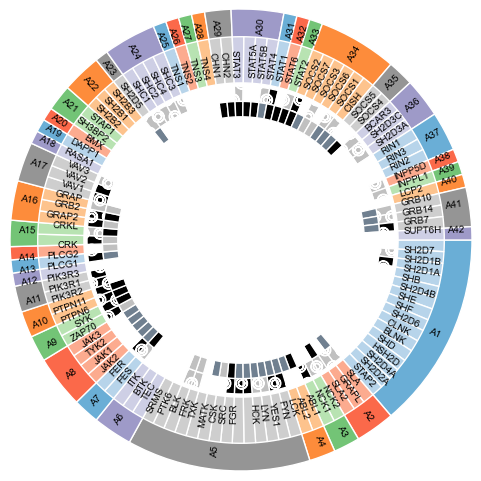

In [17]:
plt.rcParams.update({'font.size': 7})
plt.rcParams['patch.linewidth'] = 1
fig, ax = plt.subplots(figsize=(5,5))
# plt.figure(figsize=(20,20)) 
ax.axis('equal')
mypie, _ = ax.pie(group_sizes, radius=1.5, labels=group_names_arch, counterclock=False,rotatelabels=270, labeldistance=0.89, textprops={"fontsize":8,'font':'Arial'},colors=group_colors_1)
plt.setp( mypie, width=0.2, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_sizes, radius=1.4-0.08, labels=subgroup_names, counterclock=False,rotatelabels=250,labeldistance=0.8, textprops={"fontsize":8,'font':'Arial'}, colors=subgroup_colors)
plt.setp( mypie2, width=0.3, edgecolor='white')
plt.margins(0,0)

mypie3, _ = ax.pie(interpro_sizes, radius=1.35-0.35,counterclock=False, hatch='oO', textprops={"fontsize":1, 'ha':'center','weight':'bold','color':'white'}, colors=interpro_colors)
plt.setp( mypie3, width=0.1, edgecolor='white')
plt.margins(0,0) 

mypie4, _ = ax.pie(intrapro_sizes, radius=1.2-0.3, counterclock=False, textprops={"fontsize":1, 'ha':'center','weight':'bold','color':'white'}, colors=intrapro_colors)
plt.setp( mypie4, width=0.1, edgecolor='white')
plt.margins(0,0)

cmap = plt.cm.coolwarm
custom_lines = [Line2D([0], [0], color='black', lw=4),
                Line2D([0], [0], color='slategrey', lw=4),
                Line2D([0], [0], color='silver', lw=4)]
handles, labels = plt.gca().get_legend_handles_labels()
patch1 = mpatches.Patch(color='black', label='Experiment') 
patch2 = mpatches.Patch(color='slategrey', label='AlphaFold') 
patch3 = mpatches.Patch(color='silver', label='Inferred') 
fig.savefig('SH2ome.svg', format='svg')


In [8]:
# lig_exp
inputfile1 = 'SH2_IPR000980_Ligand_Exp.feature'
interpro, count1 = count_genes(inputfile1)

# id_exp
inputfile2 = 'SH2_IPR000980_interDomain_Exp.feature'
intrapro, count2 = count_genes(inputfile2)

# id_af
inputfile3 = 'SH2_IPR000980_interDomain_Alphafold.feature'
af, count3 = count_genes(inputfile3)

# lig_inf
inputfile4 = 'SH2_IPR000980_Ligand_Inferred.feature'
inter_infer, count4 = count_genes(inputfile4)

# id_inf
inputfile5 = 'SH2_IPR000980_interDomain_inferred.feature'
intra_infer, count5 = count_genes(inputfile5)  

count1, count2, count3, count4, count5 

(23, 19, 41, 33, 10)

In [14]:
labeldict

{'A1': 'SH2',
 'A2': 'SH3_domain|SH2',
 'A3': 'SH3_domain|SH3_domain|SH3_domain|SH2',
 'A4': 'SH3_domain|SH2|Prot_kinase_dom|F-actin-binding',
 'A5': 'SH3_domain|SH2|Prot_kinase_dom',
 'A6': 'PH_domain|SH3_domain|SH2|Prot_kinase_dom',
 'A7': 'FCH_dom|SH2|Prot_kinase_dom',
 'A8': 'FERM_domain|SH2|Prot_kinase_dom|Prot_kinase_dom',
 'A9': 'SH2|SH2|Prot_kinase_dom',
 'A10': 'SH2|SH2|PTP_cat',
 'A11': 'SH3_domain|RhoGAP_dom|SH2|SH2',
 'A12': 'SH2|SH2',
 'A13': 'PH_domain|PLipase_C_PInositol-sp_X_dom|SH2|SH2|SH3_domain|PH_domain|PLipase_C_Pinositol-sp_Y|C2_dom',
 'A14': 'PH_domain|EF_hand_dom|PLipase_C_PInositol-sp_X_dom|SH2|SH2|SH3_domain|PLipase_C_Pinositol-sp_Y|C2_dom',
 'A15': 'SH2|SH3_domain|SH3_domain',
 'A16': 'SH3_domain|SH2|SH3_domain',
 'A17': 'CH_dom|DH-domain|PH_domain|PE/DAG-bd|SH3_domain|SH2|SH3_domain',
 'A18': 'SH2|SH3_domain|SH2|PH_domain|C2_dom|RasGAP_dom',
 'A19': 'SH2|PH_domain',
 'A20': 'PH_domain|SH2|Prot_kinase_dom',
 'A21': 'PH_domain|SH2',
 'A22': 'Phe_ZIP|PH_domain|

In [15]:
group_names

['SH2',
 'SH3_domain|SH2',
 'SH3_domain|SH3_domain|SH3_domain|SH2',
 'SH3_domain|SH2|Prot_kinase_dom|F-actin-binding',
 'SH3_domain|SH2|Prot_kinase_dom',
 'PH_domain|SH3_domain|SH2|Prot_kinase_dom',
 'FCH_dom|SH2|Prot_kinase_dom',
 'FERM_domain|SH2|Prot_kinase_dom|Prot_kinase_dom',
 'SH2|SH2|Prot_kinase_dom',
 'SH2|SH2|PTP_cat',
 'SH3_domain|RhoGAP_dom|SH2|SH2',
 'SH2|SH2',
 'PH_domain|PLipase_C_PInositol-sp_X_dom|SH2|SH2|SH3_domain|PH_domain|PLipase_C_Pinositol-sp_Y|C2_dom',
 'PH_domain|EF_hand_dom|PLipase_C_PInositol-sp_X_dom|SH2|SH2|SH3_domain|PLipase_C_Pinositol-sp_Y|C2_dom',
 'SH2|SH3_domain|SH3_domain',
 'SH3_domain|SH2|SH3_domain',
 'CH_dom|DH-domain|PH_domain|PE/DAG-bd|SH3_domain|SH2|SH3_domain',
 'SH2|SH3_domain|SH2|PH_domain|C2_dom|RasGAP_dom',
 'SH2|PH_domain',
 'PH_domain|SH2|Prot_kinase_dom',
 'PH_domain|SH2',
 'Phe_ZIP|PH_domain|SH2',
 'PTB/PI_dom|SH2',
 'PID_Shc-like|SH2',
 'PE/DAG-bd|Tyr_Pase_cat|Tensin_C2-dom|SH2|PTB/PI_dom',
 'PE/DAG-bd|Tensin_phosphatase|Tensin_C2-do